In [1]:
from loguru import logger
import ndf.download
from ndf.datamining import datamining
import warnings
import sys
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)

log_level = 'ERROR'
logger.add(sys.stderr, format="{time} {level} {message}", filter="my_module", level=log_level)
# logger.add(sys.stdout, colorize=True, format="<green>{time}</green> <level>{message}</level>")
logger.add("ndfdownload.log", rotation="30 MB", level=log_level)

2

In [2]:
from datetime import datetime

a = datetime.now()
a.date()

datetime.date(2023, 5, 29)

In [3]:
logger.remove()

In [4]:
d = ndf.download.download()
d.download_all()

bgc ok
tradition ok
prebontullet ok
gfi ok


In [5]:
mining = datamining()

In [6]:
tulletprebon = mining.tulletprebon_calcs()

In [7]:
bgc = mining.bgc_calcs()

In [8]:
tradition = mining.tradition_calcs()

In [9]:
gfi = mining.gfi_calcs()

In [10]:
tulletprebon['source'] = 'TulletPrebon'
tradition['source'] = 'Tradition'
bgc['source'] = 'bgc'
gfi['source'] = 'gfi'

In [11]:
bgc

,Total for human,Volume,source
Class,,,
BMF,1.3B,1295000000,bgc
BMF2,372.5M,372500000,bgc
BMF4,50M,50000000,bgc
BROKEN,346.5M,346500000,bgc
TOTAL,2.06B,2064000000,bgc


In [12]:
df_result = pd.concat([tulletprebon, tradition, bgc, gfi])
df_result

,Total for human,Volume,source
Class,,,
BMF1,3.75B,3752800000,TulletPrebon
BMF2,874M,874000000,TulletPrebon
BMF3,470M,470000000,TulletPrebon
BROKEN,1.26B,1258000000,TulletPrebon
GT 1 YEAR,25M,25000000,TulletPrebon
LONGER,710M,710000000,TulletPrebon
PTAX,356.5M,356500000,TulletPrebon
TOMPTAX,20M,20000000,TulletPrebon
TOTAL,7.69B,7691550000,TulletPrebon


In [13]:
df_totals = df_result.query('Class == "TOTAL"')
df_totals

,Total for human,Volume,source
Class,,,
TOTAL,7.69B,7691550000,TulletPrebon
TOTAL,0,0,Tradition
TOTAL,2.06B,2064000000,bgc
TOTAL,2.59B,2588000000,gfi


In [14]:
df_totals.groupby(['Class']).sum()

,Volume
Class,
TOTAL,12343550000


In [15]:
from numerize import numerize

market_total = df_totals.sum()['Volume']
market_total = numerize.numerize(float(market_total))
market_total

'12.34B'

In [16]:
summary = mining.market_summary()
summary

,Total for human,Volume,source
Class,,,
TOTAL,7.69B,7691550000,TulletPrebon
TOTAL,0,0,Tradition
TOTAL,2.06B,2064000000,bgc
TOTAL,2.59B,2588000000,gfi


In [17]:
market_total = mining.market_total()
market_total

'12.34B'

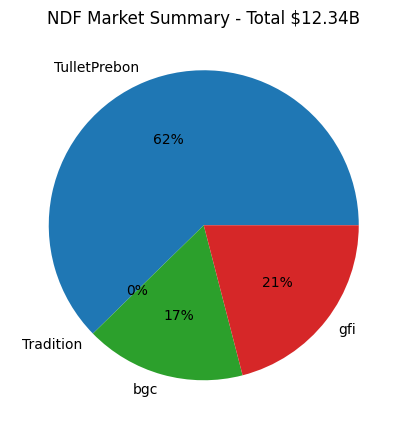

In [18]:
import matplotlib.pyplot as plt

market_total = mining.market_total()
summary = mining.market_summary()

fig = plt.figure(figsize=(5, 6))
plt.pie(summary['Volume'], labels=summary['source'], autopct='%1.0f%%')
plt.title(f'NDF Market Summary - Total ${market_total}')
plt.savefig('pie.png', dpi=fig.dpi, bbox_inches='tight')
# plt.show()


True

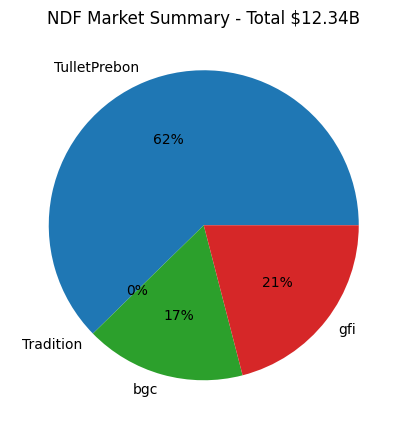

In [19]:
mining.generate_chart()